### Imports

In [40]:
# Imports
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix, auc, roc_curve, roc_auc_score, average_precision_score

from imblearn.over_sampling import RandomOverSampler, SMOTE

# measuring fairness
from fairlearn.metrics import (
    count,
    demographic_parity_difference,
    equalized_odds_difference,
    false_positive_rate,
    false_negative_rate,
    MetricFrame,
    make_derived_metric,
    selection_rate,  
)
from sklearn.metrics import precision_score
from sklearn.calibration import calibration_curve

import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv("compas-scores-two-years.csv")

In [62]:
data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [65]:
data.columns.tolist()

['id',
 'name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age',
 'age_cat',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_offense_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'is_violent_recid',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score.1',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody',
 'priors_count.1',
 'start',
 'end',
 'event',
 'two_year_recid']

In [4]:
# filter similar to propublica
data = data[
    (data["days_b_screening_arrest"] <= 30)
    & (data["days_b_screening_arrest"] >= -30)
    & (data["is_recid"] != -1)
    & (data["c_charge_degree"] != "O")
    & (data["score_text"] != "N/A")
]
# select columns
data = data[["sex", "age", "race", "priors_count", "decile_score", "two_year_recid"]]
# cut-off score 5
data["decile_score_cutoff"] = (data["decile_score"] >= 5).astype(int)
# inspect
data.head()

,sex,age,race,priors_count,decile_score,two_year_recid,decile_score_cutoff
0,Male,69,Other,0,1,0,0
1,Male,34,African-American,0,3,1,0
2,Male,24,African-American,4,4,1,0
5,Male,44,Other,0,1,0,0
6,Male,41,Caucasian,14,6,1,1


In [5]:
data.race.unique()

array(['Other', 'African-American', 'Caucasian', 'Hispanic', 'Asian',
       'Native American'], dtype=object)

In [6]:
display(data["sex"].value_counts())
display(data["race"].value_counts())

Male      4997
Female    1175
Name: sex, dtype: int64

African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: race, dtype: int64

In [7]:
# select two largest groups
data = data[(data["race"] == "African-American") | (data["race"] == "Caucasian")]

In [8]:
data.head()

,sex,age,race,priors_count,decile_score,two_year_recid,decile_score_cutoff
1,Male,34,African-American,0,3,1,0
2,Male,24,African-American,4,4,1,0
6,Male,41,Caucasian,14,6,1,1
8,Female,39,Caucasian,0,1,0,0
10,Male,27,Caucasian,0,4,0,0


In [11]:
# toyset = pd.read_csv("ToySet.csv")

In [9]:
# toyset

In [10]:
# toyset.target.sum()

In [12]:
# toyset['bigen'] = (toyset['gender'] == 'm').astype(int)

In [13]:
# toyset = toyset[['target', 'bigen']]

In [14]:
# toyset

In [15]:
# toyset.value_counts()

In [20]:
data.value_counts(['race', 'two_year_recid']).to_frame()

0
race             two_year_recid      
African-American 1               1661
                 0               1514
Caucasian        0               1281
                 1                822

In [17]:
data.describe()

,age,priors_count,decile_score,two_year_recid,decile_score_cutoff
count,5278.000000,5278.000000,5278.000000,5278.000000,5278.000000
mean,34.449413,3.461538,4.622774,0.470443,0.478401
std,11.732619,4.875903,2.841260,0.499173,0.499581
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,25.000000,0.000000,2.000000,0.000000,0.000000
50%,31.000000,2.000000,4.000000,0.000000,0.000000
75%,42.000000,5.000000,7.000000,1.000000,1.000000
max,80.000000,38.000000,10.000000,1.000000,1.000000


In [18]:
data['two_year_recid'].unique()

array([1, 0], dtype=int64)

In [35]:
# by choosing y_pred to be ground truth instead of predictions, we can easily compute the base rate in the data
mf = MetricFrame(
    metrics={"base rate": selection_rate},
    y_true=data["two_year_recid"],  # y_true is ignored
    y_pred=data["two_year_recid"],
    sensitive_features=data["race"],
)
display(mf.by_group)

# summarize demographic parity as the max difference between groups
print("base rate diff: %.2f" % mf.difference(method="between_groups"))

,base rate
race,
African-American,0.52315
Caucasian,0.39087


base rate diff: 0.13


In [34]:
# compute metrics
mf = MetricFrame(
    metrics={
        "false positive rate": false_positive_rate,
        "false negative rate": false_negative_rate,
    },
    y_true=data["two_year_recid"],
    y_pred=data["decile_score_cutoff"],
    sensitive_features=data["race"],
)
display(mf.by_group)

# print differences
for i in mf.difference("between_groups").iteritems():
    print("%s diff: %.2f" % i)

# alternatively: summarize equalized odds in one metric (which is the max of fpr diff and fnr diff)
dpd = equalized_odds_difference(
    data["two_year_recid"],
    data["decile_score_cutoff"],
    sensitive_features=data["race"],
    method="between_groups",
)
print("equalized odds diff: %.2f" % dpd)

,false positive rate,false negative rate
race,,
African-American,0.423382,0.284768
Caucasian,0.220141,0.49635


false positive rate diff: 0.20
false negative rate diff: 0.21
equalized odds diff: 0.21


In [37]:
# first, we define a function to compute the negative predictie value
def negative_predictive_value_score(y_true, y_pred, **kwargs):
    """
    NPV is not in scikit-learn, but is the same as PPV but with 0 and 1 swapped.
    """
    return precision_score(y_true, y_pred, pos_label=0, **kwargs)

In [50]:
# compute metrics
mf = MetricFrame(
    metrics={
        "positive predictive value": precision_score,
        "negative predictive value": negative_predictive_value_score,
    },
    y_true=data["two_year_recid"],
    y_pred=data["decile_score_cutoff"],
    sensitive_features=data["race"],
)
display(mf.by_group)

# summarize differences
for i in mf.difference("between_groups").iteritems():
    print("%s diff: %.2f" % i)

,positive predictive value,negative predictive value
race,,
African-American,0.649535,0.648588
Caucasian,0.594828,0.710021


positive predictive value diff: 0.05
negative predictive value diff: 0.06


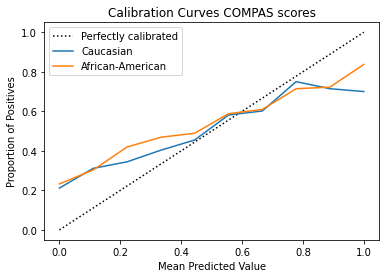

In [58]:
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for race in ["Caucasian", "African-American"]:
    prob_true, prob_pred = calibration_curve(
        y_true=data[data["race"] == race]["two_year_recid"],
        y_prob=data[data["race"] == race]["decile_score"],
        n_bins=10,
        normalize=True,
    )
    plt.plot(prob_pred, prob_true, label=race)
plt.title("Calibration Curves COMPAS scores")
plt.xlabel("Mean Predicted Value")
plt.ylabel("Proportion of Positives")
plt.legend()
plt.show()

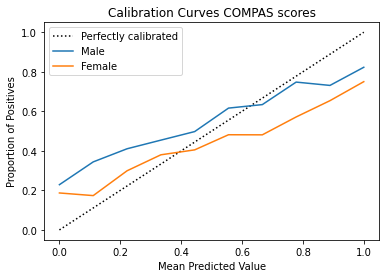

In [57]:
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for sex in ["Male", "Female"]:
    prob_true, prob_pred = calibration_curve(
        y_true=data[data["sex"] == sex]["two_year_recid"],
        y_prob=data[data["sex"] == sex]["decile_score"],
        n_bins=10,
        normalize=True,
    )
    plt.plot(prob_pred, prob_true, label=sex)
plt.title("Calibration Curves COMPAS scores")
plt.xlabel("Mean Predicted Value")
plt.ylabel("Proportion of Positives")
plt.legend()
plt.show()

In [59]:
data

,sex,age,race,priors_count,decile_score,two_year_recid,decile_score_cutoff
1,Male,34,African-American,0,3,1,0
2,Male,24,African-American,4,4,1,0
6,Male,41,Caucasian,14,6,1,1
8,Female,39,Caucasian,0,1,0,0
10,Male,27,Caucasian,0,4,0,0
...,...,...,...,...,...,...,...
7207,Male,30,African-American,0,2,1,0
7208,Male,20,African-American,0,9,0,1
7209,Male,23,African-American,0,7,0,1
7210,Male,23,African-American,0,3,0,0


In [60]:
y = data['two_year_recid']
X = data[]